In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
potato_price=pd.read_csv("../data/156수민/감자garakFix20250903153031726.csv",encoding= "cp949")
sweet_price=pd.read_csv("../data/156수민/고구마garakFix20250903153124390.csv",encoding= "cp949")
oyster_price=pd.read_csv("../data/156수민/느타리버섯garakFix20250903151558966.csv",encoding= "cp949")
dan_price=pd.read_csv("../data/156수민/단호박garakFix20250903153106255.csv",encoding= "cp949")
new_price=pd.read_csv("../data/156수민/새송이버섯garakFix20250903151641579.csv",encoding= "cp949")
sheep_price=pd.read_csv("../data/156수민/양송이버섯garakFix20250903151700224.csv",encoding= "cp949")
red_price=pd.read_csv("../data/156수민/적양배추garakFix20250903152918646.csv",encoding= "cp949")
tomato_price=pd.read_csv("../data/156수민/토마토전체garakFix20250903153007166.csv",encoding= "cp949")
spin_price=pd.read_csv("../data/156수민/팽이버섯garakFix20250903151546379.csv",encoding= "cp949")
pyogo_price=pd.read_csv("../data/156수민/표고버섯garakFix20250903151537560.csv",encoding= "cp949")


In [4]:
potato_price

,거래일자,품목명,반입량,금액,전년 반입량,전년 반입량 증감률(%),전년 금액,전년 금액 증감률(%),평년 반입량,평년 반입량 증감률(%),평년 금액,평년 금액 증감률(%)
0,2025-06-30,감자(수입),NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2025-06-29,감자(수입),NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
2,2025-06-28,감자(수입),NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2025-06-27,감자(수입),NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2025-06-26,감자(수입),NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40189,2015-07-04,홍감자,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
40190,2015-07-03,홍감자,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
40191,2015-07-02,홍감자,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
40192,2015-07-01,홍감자,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [15]:
# === 결측치 패턴 점검 (컬럼 고정 버전) ===========================
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize

# 프로젝트 기본 컬럼 세트
DATE_COL = "거래일자"
ITEM_COL = "품목명"

NUM_COLS  = ["반입량", "금액", "전년 반입량", "전년 금액", "평년 반입량", "평년 금액"]
RATE_COLS = ["전년 반입량 증감률(%)", "전년 금액 증감률(%)", "평년 반입량 증감률(%)", "평년 금액 증감률(%)"]
TARGET_COLS = NUM_COLS + RATE_COLS

def _assert_columns(df: pd.DataFrame, cols):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"데이터프레임에 다음 컬럼이 없습니다: {missing}")

def _ensure_datetime(df: pd.DataFrame, date_col: str):
    if not np.issubdtype(df[date_col].dtype, np.datetime64):
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# 1) 열별 결측 개요
def missing_overview(df: pd.DataFrame):
    n = len(df)
    miss = df.isna().sum()
    rate = (miss / n).round(4)
    comp = (1 - rate).round(4)
    out = pd.DataFrame({"결측개수": miss, "결측률": rate, "완전률": comp})
    return out.sort_values("결측률", ascending=False)

# 2) 시점별(주/월) 결측률
def _resample_missing(df, date_col, freq="W"):
    d = df.copy()
    _ensure_datetime(d, date_col)
    d = d.sort_values(date_col).set_index(date_col)
    return d.isna().resample(freq).mean()

def plot_missing_trend(df, date_col=DATE_COL, cols=None, freq="W", title=None, save_path=None):
    koreanize()
    g = _resample_missing(df, date_col, freq=freq)
    if cols is not None:
        g = g[[c for c in cols if c in g.columns]]
    plt.figure(figsize=(10,4))
    g.plot(ax=plt.gca())
    plt.title(title or f"{freq} 결측률 추이")
    plt.ylabel("결측률"); plt.xlabel("기간")
    plt.tight_layout()
    if save_path: plt.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()

# 3) 결측 동반성(열 간 같이 비는지) 히트맵
def plot_missing_corr(df, cols=None, title="결측 동반성 상관(열 간)", save_path=None):
    koreanize()
    m = df.isna().astype(int)
    if cols is not None:
        cols = [c for c in cols if c in m.columns]
        m = m[cols]
    corr = m.corr()
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(corr.values, aspect="auto")
    ax.set_xticks(range(len(corr.columns))); ax.set_yticks(range(len(corr.index)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right"); ax.set_yticklabels(corr.index)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_title(title)
    plt.tight_layout()
    if save_path: fig.savefig(save_path, dpi=150, bbox_inches="tight")
    plt.show()
    return corr

# 4) 그룹별(품목) 결측률
def missing_by_group(df, group_col=ITEM_COL, target_cols=TARGET_COLS):
    d = df.copy()
    keep = [c for c in target_cols if c in d.columns]
    return d.groupby(group_col)[keep].apply(lambda x: x.isna().mean()).sort_index()

# 5) 결측 스파이크 자동 탐지 (주간 결측률 z-score 기준)
def detect_missing_spikes(df, date_col=DATE_COL, cols=TARGET_COLS, freq="W", z=2.5, roll=8):
    g = _resample_missing(df, date_col, freq=freq)
    cols = [c for c in cols if c in g.columns]
    spikes = {}
    for c in cols:
        s = g[c]
        mu = s.rolling(roll, min_periods=max(4, roll//2)).mean()
        sd = s.rolling(roll, min_periods=max(4, roll//2)).std()
        zscore = (s - mu) / sd.replace(0, np.nan)
        spikes[c] = zscore[zscore >= z]
    return spikes  # {열: 스파이크 시점(z≥z)}

# 6) 원-클릭 실행
def run_missing_suite(df: pd.DataFrame, save_prefix=None):
    # 컬럼 확인
    must = [DATE_COL, ITEM_COL] + TARGET_COLS
    _assert_columns(df, [c for c in must if c not in [None]])
    _ensure_datetime(df, DATE_COL)

    # (a) 열별 결측 개요
    ov = missing_overview(df)
    print("\n[열별 결측 개요 Top 15]\n", ov.head(15))

    # (b) 주/월 추이 (핵심 컬럼 중심)
    key_cols = [c for c in ["금액","반입량","전년 금액","전년 반입량","평년 금액","평년 반입량"] if c in df.columns]
    plot_missing_trend(df, DATE_COL, cols=key_cols, freq="W",
                       title="주간 결측률 추이 (핵심 수치 컬럼)",
                       save_path=(f"{save_prefix}_trend_week.png" if save_prefix else None))
    plot_missing_trend(df, DATE_COL, cols=TARGET_COLS, freq="M",
                       title="월간 결측률 추이 (전체 타깃 열)",
                       save_path=(f"{save_prefix}_trend_month.png" if save_prefix else None))

    # (c) 결측 동반성
    corr = plot_missing_corr(df, cols=TARGET_COLS,
                             title="결측 동반성 상관(타깃 열 중심)",
                             save_path=(f"{save_prefix}_missing_corr.png" if save_prefix else None))
    print("\n[결측 동반성 상관 Top(금액 기준)]")
    if "금액" in corr.columns:
        print(corr["금액"].sort_values(ascending=False).head(10))

    # (d) 품목별 결측 테이블
    by_item = missing_by_group(df, ITEM_COL, TARGET_COLS)
    print("\n[품목별 결측률 샘플]\n", by_item.head(10))

    # (e) 결측 스파이크 자동탐지
    spikes = detect_missing_spikes(df, DATE_COL, TARGET_COLS, freq="W", z=2.5, roll=8)
    print("\n[스파이크 요약]")
    for col, s in spikes.items():
        print(f"- {col}: 스파이크 {len(s)}건")

    # 저장 옵션
    if save_prefix:
        ov.to_csv(f"{save_prefix}_overview.csv", encoding="utf-8-sig")
        by_item.to_csv(f"{save_prefix}_by_item.csv", encoding="utf-8-sig")

    return {"overview": ov, "corr": corr, "by_item": by_item, "spikes": spikes}
# ===============================================================



[열별 결측 개요 Top 15]
                 결측개수     결측률     완전률
전년 반입량         30908  0.7690  0.2310
전년 금액          30909  0.7690  0.2310
평년 금액          29462  0.7330  0.2670
평년 반입량         29452  0.7327  0.2673
반입량            29435  0.7323  0.2677
금액             29427  0.7321  0.2679
거래일자               0  0.0000  1.0000
품목명                0  0.0000  1.0000
전년 반입량 증감률(%)      0  0.0000  1.0000
전년 금액 증감률(%)       0  0.0000  1.0000
평년 반입량 증감률(%)      0  0.0000  1.0000
평년 금액 증감률(%)       0  0.0000  1.0000


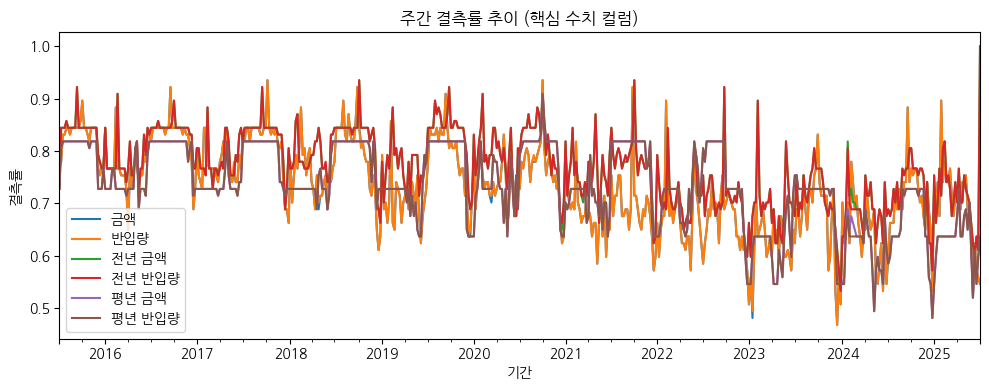

C:\Users\User\AppData\Local\Temp\ipykernel_15740\3658332286.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return d.isna().resample(freq).mean()


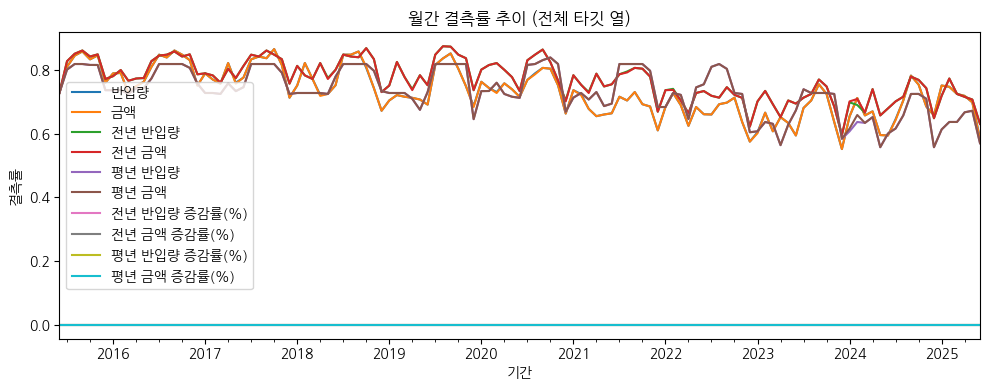

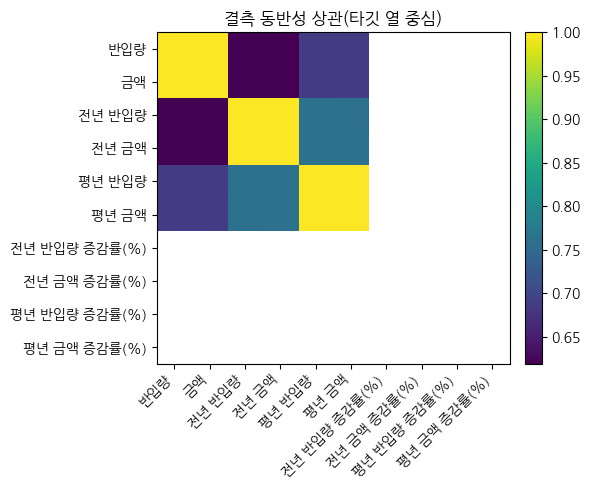


[결측 동반성 상관 Top(금액 기준)]
금액               1.000000
반입량              0.999366
평년 금액            0.687163
평년 반입량           0.686619
전년 금액            0.620316
전년 반입량           0.619590
전년 반입량 증감률(%)         NaN
전년 금액 증감률(%)          NaN
평년 반입량 증감률(%)         NaN
평년 금액 증감률(%)          NaN
Name: 금액, dtype: float64

[품목별 결측률 샘플]
              반입량        금액    전년 반입량     전년 금액    평년 반입량     평년 금액  \
품목명                                                                  
감자(수입)  0.870279  0.870553  0.956212  0.956212  0.972906  0.972906   
감자(일반)  0.998358  0.998358  0.998358  0.998358  0.998084  0.998084   
기타      0.215928  0.215654  0.217570  0.217296  0.005747  0.005747   
대지      0.680624  0.679256  0.719759  0.718391  0.556650  0.556650   
돼지감자    0.981390  0.981390  0.996442  0.996442  1.000000  1.000000   
두백      0.570608  0.570334  0.654899  0.654899  0.740285  0.740285   
수미      0.168035  0.167761  0.167214  0.169130  0.001095  0.003831   
자주감자    0.977285  0.977285  0.993979  0.993979

{'overview':                 결측개수     결측률     완전률
 전년 반입량         30908  0.7690  0.2310
 전년 금액          30909  0.7690  0.2310
 평년 금액          29462  0.7330  0.2670
 평년 반입량         29452  0.7327  0.2673
 반입량            29435  0.7323  0.2677
 금액             29427  0.7321  0.2679
 거래일자               0  0.0000  1.0000
 품목명                0  0.0000  1.0000
 전년 반입량 증감률(%)      0  0.0000  1.0000
 전년 금액 증감률(%)       0  0.0000  1.0000
 평년 반입량 증감률(%)      0  0.0000  1.0000
 평년 금액 증감률(%)       0  0.0000  1.0000,
 'corr':                     반입량        금액    전년 반입량     전년 금액    평년 반입량     평년 금액  \
 반입량            1.000000  0.999366  0.619183  0.619908  0.686164  0.686707   
 금액             0.999366  1.000000  0.619590  0.620316  0.686619  0.687163   
 전년 반입량         0.619183  0.619590  1.000000  0.998950  0.760873  0.760339   
 전년 금액          0.619908  0.620316  0.998950  1.000000  0.760671  0.761204   
 평년 반입량         0.686164  0.686619  0.760873  0.760671  1.000000  0.999365   
 평년 금액          0

In [16]:
run_missing_suite(potato_price)

해석 요약 (결측 패턴) — Markdown
1) 구조적 결측이 매우 큼 (핵심 수치 73–77%)

반입량·금액: 약 73.2%

전년*: 약 76.9%

평년*: 약 73.3%

반면 증감률 4개 열은 결측 0% → “율 데이터는 꽉 찼는데, 분자/분모 값은 비어 있는” 불일치 가능성.

2) 결측이 ‘쌍으로’ 같이 비는 패턴 (결측 동반성)

결측 상관(=결측 마스크 상관)에서

반입량 ↔ 금액 ≈ 0.999

평년 반입량 ↔ 평년 금액 ≈ 0.999

전년 반입량 ↔ 전년 금액 ≈ 0.999

→ 같은 소스/동일 수집 이벤트로 동시 결손. **대치는 “쌍 단위”**로 판단해야 함.

⚠️ 주의: 이는 값의 상관이 아니라 ‘결측의 동시성’ 상관임.

3) 품목별 이질성 (커버리지 편차 매우 큼)

수미: 현행 결측 ~16.8% / 평년 거의 0%

기타: 현행 결측 ~21.6% / 평년 거의 0%

다수 품목(감자(일반), 자주감자, 추백감자, 돼지감자 등)은 현행·전년·평년 모두 95–100% 결측

→ 모델링/시계열 분석은 ‘수미/기타(+두백·대지 일부)’ 중심으로 먼저 진행하는 게 현실적.

4) 결측 스파이크 없음

주 단위 z ≥ 2.5 스파이크 0건 → 이벤트성 결손이 아니라 상시·구조적 결손.

→ 공휴일/특정주 페널티 플래그 우선순위 낮음, 커버리지 기반 필터링/대치가 핵심.


[열별 결측 개요 Top 15]
                 결측개수     결측률     완전률
전년 반입량         14644  0.5725  0.4275
전년 금액          14641  0.5724  0.4276
반입량            14638  0.5723  0.4277
금액             14635  0.5722  0.4278
평년 반입량         12073  0.4720  0.5280
평년 금액          12073  0.4720  0.5280
거래일자               0  0.0000  1.0000
품목명                0  0.0000  1.0000
전년 반입량 증감률(%)      0  0.0000  1.0000
전년 금액 증감률(%)       0  0.0000  1.0000
평년 반입량 증감률(%)      0  0.0000  1.0000
평년 금액 증감률(%)       0  0.0000  1.0000


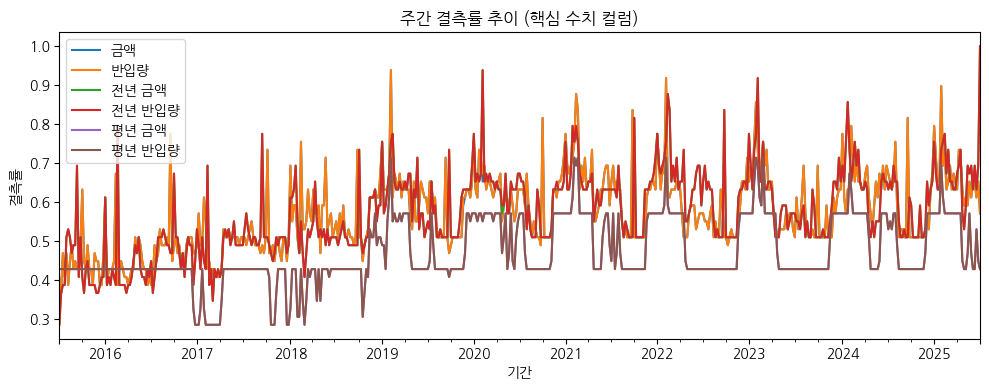

C:\Users\User\AppData\Local\Temp\ipykernel_15740\3658332286.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return d.isna().resample(freq).mean()


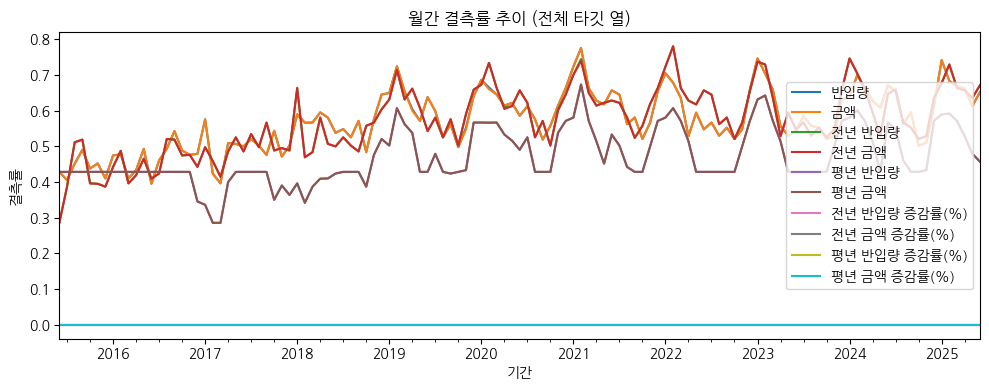

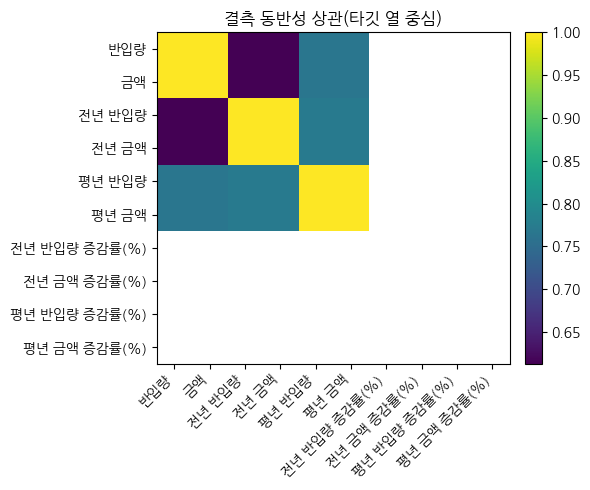


[결측 동반성 상관 Top(금액 기준)]
금액               1.000000
반입량              0.999760
평년 반입량           0.764715
평년 금액            0.764715
전년 금액            0.613470
전년 반입량           0.613218
전년 반입량 증감률(%)         NaN
전년 금액 증감률(%)          NaN
평년 반입량 증감률(%)         NaN
평년 금액 증감률(%)          NaN
Name: 금액, dtype: float64

[품목별 결측률 샘플]
                반입량        금액    전년 반입량     전년 금액    평년 반입량     평년 금액  \
품목명                                                                    
고구마순(수입)  0.999726  0.999726  1.000000  1.000000  1.000000  1.000000   
기타        0.306240  0.306240  0.309797  0.309797  0.075260  0.075260   
물고구마      0.994527  0.994527  0.999726  0.999726  1.000000  1.000000   
밤고구마      0.227696  0.226875  0.221949  0.221128  0.000000  0.000000   
생고구마순     0.406951  0.406951  0.418172  0.418172  0.308429  0.308429   
호박고구마     0.169130  0.169130  0.167488  0.167488  0.000000  0.000000   
황금고구마     0.901752  0.901752  0.890531  0.890531  0.920361  0.920361   

          전년 반입량 증감률(%)  전년

{'overview':                 결측개수     결측률     완전률
 전년 반입량         14644  0.5725  0.4275
 전년 금액          14641  0.5724  0.4276
 반입량            14638  0.5723  0.4277
 금액             14635  0.5722  0.4278
 평년 반입량         12073  0.4720  0.5280
 평년 금액          12073  0.4720  0.5280
 거래일자               0  0.0000  1.0000
 품목명                0  0.0000  1.0000
 전년 반입량 증감률(%)      0  0.0000  1.0000
 전년 금액 증감률(%)       0  0.0000  1.0000
 평년 반입량 증감률(%)      0  0.0000  1.0000
 평년 금액 증감률(%)       0  0.0000  1.0000,
 'corr':                     반입량        금액    전년 반입량     전년 금액    평년 반입량     평년 금액  \
 반입량            1.000000  0.999760  0.613124  0.613377  0.764518  0.764518   
 금액             0.999760  1.000000  0.613218  0.613470  0.764715  0.764715   
 전년 반입량         0.613124  0.613218  1.000000  0.999760  0.770296  0.770296   
 전년 금액          0.613377  0.613470  0.999760  1.000000  0.770494  0.770494   
 평년 반입량         0.764518  0.764715  0.770296  0.770494  1.000000  1.000000   
 평년 금액          0

In [17]:
run_missing_suite(sweet_price)